# Introdução ao Pandas DataFrame

O **DataFrame** é considerado por muitos como o principal objeto do módulo Pandas. Ele pode ser visto como uma matriz com linhas e colunas rotuladas ou simplesmente como um conjunto de Series. Cada coluna de um DataFrame pode ser retornado como uma Series.

Para mais informações sobre o objeto **DataFrame** do Pandas clique [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html).

O código fonte do objeto DataFrame está disponível no Github. Quem tiver curiosidade pode visualizar clicando [aqui](https://github.com/pandas-dev/pandas/blob/v0.24.2/pandas/core/frame.py).

In [100]:
# Importando os módulos
import numpy as np
import pandas as pd

In [101]:
linhas = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
colunas = ["A", "B", "C", "D", "E"]
np.random.seed(1)
dados = np.random.randint(0,100,(10,5))
df = pd.DataFrame(dados, linhas, colunas)
df

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [102]:
type(df)

pandas.core.frame.DataFrame

In [103]:
# Informações sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int32
 1   B       10 non-null     int32
 2   C       10 non-null     int32
 3   D       10 non-null     int32
 4   E       10 non-null     int32
dtypes: int32(5)
memory usage: 280.0 bytes


In [104]:
# Medidas estatísticas do DataFrame
df.describe()

,A,B,C,D,E
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,35.800000,45.500000,45.100000,45.300000,45.000000
std,28.785799,37.880661,36.354581,27.912761,31.742016
min,5.000000,1.000000,0.000000,9.000000,1.000000
25%,11.750000,12.500000,7.750000,18.250000,21.250000
50%,29.500000,44.500000,56.500000,53.500000,39.000000
75%,52.000000,77.000000,70.000000,66.250000,74.250000
max,87.000000,94.000000,96.000000,86.000000,87.000000


<Axes: >

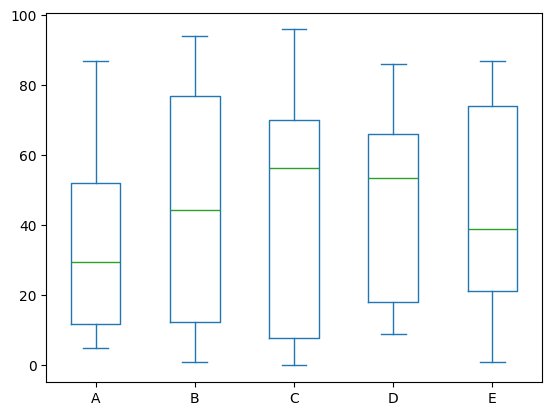

In [105]:
# Plotagem de gráficos
%matplotlib inline
df.plot.box()

<Axes: >

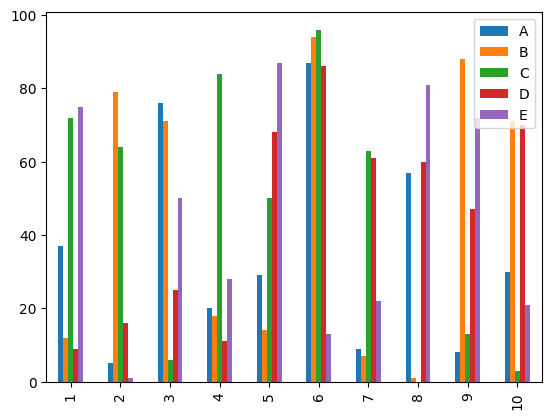

In [106]:
df.plot.bar()

In [107]:
# Selecionar uma coluna
df["A"]

1     37
2      5
3     76
4     20
5     29
6     87
7      9
8     57
9      8
10    30
Name: A, dtype: int32

In [108]:
df["B"]

1     12
2     79
3     71
4     18
5     14
6     94
7      7
8      1
9     88
10    71
Name: B, dtype: int32

In [109]:
type(df["B"])

pandas.core.series.Series

In [110]:
# Selecionando múltiplas colunas
df[["C", "D", "E"]]

,C,D,E
1,72,9,75
2,64,16,1
3,6,25,50
4,84,11,28
5,50,68,87
6,96,86,13
7,63,61,22
8,0,60,81
9,13,47,72
10,3,70,21


In [111]:
# Notação alternativa para seleção de colunas através do ponto (.)
df.B

1     12
2     79
3     71
4     18
5     14
6     94
7      7
8      1
9     88
10    71
Name: B, dtype: int32

In [112]:
# Inclusão de colunas
df["Total"] = df.A + df.B + df.C + df.D + df.E
df

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [113]:
# Somatório de cada coluna
df.sum()

A         358
B         455
C         451
D         453
E         450
Total    2167
dtype: int64

In [114]:
# Média aritmética de cada coluna
df.mean()

A         35.8
B         45.5
C         45.1
D         45.3
E         45.0
Total    216.7
dtype: float64

In [115]:
# Adicionando um nova linha com o somatório
tot_coluna = pd.DataFrame(np.array(df.sum()).reshape(1,6), index=['Total'], columns=df.columns)
tot_coluna

,A,B,C,D,E,Total
Total,358,455,451,453,450,2167


In [116]:
# Concatenando o DataFrame tot_coluna com o DataFrame df
df2 = pd.concat([df, tot_coluna])
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [117]:
# Outra forma de inserir uma nova linha seria ignorar os rótulos (índices) das linhas
df3 = pd.concat([df2, pd.DataFrame(df.mean()).T], ignore_index=True)
df3

,A,B,C,D,E,Total
0,37.0,12.0,72.0,9.0,75.0,205.0
1,5.0,79.0,64.0,16.0,1.0,165.0
2,76.0,71.0,6.0,25.0,50.0,228.0
3,20.0,18.0,84.0,11.0,28.0,161.0
4,29.0,14.0,50.0,68.0,87.0,248.0
5,87.0,94.0,96.0,86.0,13.0,376.0
6,9.0,7.0,63.0,61.0,22.0,162.0
7,57.0,1.0,0.0,60.0,81.0,199.0
8,8.0,88.0,13.0,47.0,72.0,228.0
9,30.0,71.0,3.0,70.0,21.0,195.0


In [118]:
# Exclusão de colunas usando o drop
df4 = df.drop("Total", axis=1) # axis = 1, excluir a coluna
df4

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [119]:
# df mantém a coluna "Total"
df

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
10,30,71,3,70,21,195


In [120]:
# Para excluir a coluna "Total" de df, é necessário usar o parâmetro inplace
df.drop("Total", axis = 1, inplace=True) # ou df = df.drop("Total", axis=1)
df

,A,B,C,D,E
1,37,12,72,9,75
2,5,79,64,16,1
3,76,71,6,25,50
4,20,18,84,11,28
5,29,14,50,68,87
6,87,94,96,86,13
7,9,7,63,61,22
8,57,1,0,60,81
9,8,88,13,47,72
10,30,71,3,70,21


In [121]:
# Exclusão de uma linha específica
df2.drop(10, inplace=True) # axis por padrão é 0 (eixo das linhas)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
3,76,71,6,25,50,228
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
7,9,7,63,61,22,162
8,57,1,0,60,81,199
9,8,88,13,47,72,228
Total,358,455,451,453,450,2167


In [122]:
# Exclusão de múltiplas linhas
df2.drop([3, 7, 8], inplace=True)
df2

,A,B,C,D,E,Total
1,37,12,72,9,75,205
2,5,79,64,16,1,165
4,20,18,84,11,28,161
5,29,14,50,68,87,248
6,87,94,96,86,13,376
9,8,88,13,47,72,228
Total,358,455,451,453,450,2167


In [123]:
# Seleção de linhas
# Pelo rótulo da linha
df.loc[[1, 5, 6]]

,A,B,C,D,E
1,37,12,72,9,75
5,29,14,50,68,87
6,87,94,96,86,13


In [124]:
# Seleção de linhas e colunas através dos rótulos
df.loc[[1, 5, 6], ["D","E"]]

,D,E
1,9,75
5,68,87
6,86,13


In [125]:
# Seleção de linhas
# Pelo índice da linha
df.iloc[[0, 4, 5]]

,A,B,C,D,E
1,37,12,72,9,75
5,29,14,50,68,87
6,87,94,96,86,13


In [126]:
df.iloc[[0, 4, 5], [3,4]] # equivalente a df.loc[[1, 5, 6], ["D","E"]]

,D,E
1,9,75
5,68,87
6,86,13


In [127]:
df.iloc[9:6:-1, 1:4] # usando notação do numpy - Linhas 9 a 7 (invertida), colunas 1 a 3

,B,C,D
10,71,3,70
9,88,13,47
8,1,0,60


### Exercitando

In [131]:
# Crie o DataFrame dfex com 12 linhas e 6 colunas conforme a saída abaixo
linhas_ex = np.arange(1, 13)
dfex = pd.DataFrame(dados_ex, index=linhas_ex, columns=colunas_ex)
dfex

,A,B,C,D,E,F
1,40,15,72,22,43,82
2,75,7,34,49,95,75
3,85,47,63,31,90,20
4,37,39,67,4,42,51
5,38,33,58,67,69,88
6,68,46,70,95,83,31
7,66,80,52,76,50,4
8,90,63,79,49,39,46
9,8,50,15,8,17,22
10,73,57,90,62,83,96


In [132]:
dfex['SubTotal1'] = dfex['A'] + dfex['C'] + dfex['E']
dfex


,A,B,C,D,E,F,SubTotal1
1,40,15,72,22,43,82,155
2,75,7,34,49,95,75,204
3,85,47,63,31,90,20,238
4,37,39,67,4,42,51,146
5,38,33,58,67,69,88,165
6,68,46,70,95,83,31,221
7,66,80,52,76,50,4,168
8,90,63,79,49,39,46,208
9,8,50,15,8,17,22,40
10,73,57,90,62,83,96,246


In [133]:
# Crie a coluna SubTotal2 que será a soma das colunas B, D e E
dfex['SubTotal2'] = dfex['B'] + dfex['D'] + dfex['E']
dfex

,A,B,C,D,E,F,SubTotal1,SubTotal2
1,40,15,72,22,43,82,155,80
2,75,7,34,49,95,75,204,151
3,85,47,63,31,90,20,238,168
4,37,39,67,4,42,51,146,85
5,38,33,58,67,69,88,165,169
6,68,46,70,95,83,31,221,224
7,66,80,52,76,50,4,168,206
8,90,63,79,49,39,46,208,151
9,8,50,15,8,17,22,40,75
10,73,57,90,62,83,96,246,202


In [134]:
# Crie a coluna Total que será a soma das colunas A, B, C, D, E e F (ou Subtotal1 + Subtotal2)
dfex['Total'] = dfex['A'] + dfex['B'] + dfex['C'] + dfex['D'] + dfex['E'] + dfex['F']
# Alternatively, you can use:
# dfex['Total'] = dfex['SubTotal1'] + dfex['SubTotal2']
dfex

,A,B,C,D,E,F,SubTotal1,SubTotal2,Total
1,40,15,72,22,43,82,155,80,274
2,75,7,34,49,95,75,204,151,335
3,85,47,63,31,90,20,238,168,336
4,37,39,67,4,42,51,146,85,240
5,38,33,58,67,69,88,165,169,353
6,68,46,70,95,83,31,221,224,393
7,66,80,52,76,50,4,168,206,328
8,90,63,79,49,39,46,208,151,366
9,8,50,15,8,17,22,40,75,120
10,73,57,90,62,83,96,246,202,461


In [135]:
# Crie um novo DataFrame dfex2 contendo apenas as colunas Subtotal1 e Subtotal2
dfex2 = dfex[['SubTotal1', 'SubTotal2']]
dfex2

,SubTotal1,SubTotal2
1,155,80
2,204,151
3,238,168
4,146,85
5,165,169
6,221,224
7,168,206
8,208,151
9,40,75
10,246,202


In [136]:
# Exclua as colunas Subtotal1 e Subtotal2 do DataFrame dfex
dfex.drop(columns=['SubTotal1', 'SubTotal2'],axis=1, inplace=True)
dfex

,A,B,C,D,E,F,Total
1,40,15,72,22,43,82,274
2,75,7,34,49,95,75,335
3,85,47,63,31,90,20,336
4,37,39,67,4,42,51,240
5,38,33,58,67,69,88,353
6,68,46,70,95,83,31,393
7,66,80,52,76,50,4,328
8,90,63,79,49,39,46,366
9,8,50,15,8,17,22,120
10,73,57,90,62,83,96,461


In [137]:
# Crie o DataFrame dfex3 contendo as 4 últimas linhas e as 3 primeiras colunas de dfex
dfex3 = dfex.iloc[-4:, :3]
dfex3

,A,B,C
9,8,50,15
10,73,57,90
11,43,32,26
12,40,34,60


In [96]:
# Insira em dfex as linhas com a soma de cada coluna
dfex.loc['Total'] = dfex.sum()
dfex

,A,B,C,D,E,F,Total
1,40,15,72,22,43,82,274
2,75,7,34,49,95,75,335
3,85,47,63,31,90,20,336
4,37,39,67,4,42,51,240
5,38,33,58,67,69,88,353
6,68,46,70,95,83,31,393
7,66,80,52,76,50,4,328
8,90,63,79,49,39,46,366
9,8,50,15,8,17,22,120
10,73,57,90,62,83,96,461
